# Summary Time-Series Data Exploration

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in CSVS

In [23]:
all_csv = ['../data/OpExp_Total.csv','../data/CapFund_Total.csv','../data/UPT.csv']
print(all_csv)

['../data/OpExp_Total.csv', '../data/CapFund_Total.csv', '../data/UPT.csv']


Load in information and specify city

In [24]:
opexp = pd.read_csv(all_csv[0])
opexp_testing = opexp.drop(['2019'], axis=1)
capfund = pd.read_csv(all_csv[1])
capfund_testing = capfund.drop(['2019'], axis=1)
ridership = pd.read_csv(all_csv[2])
ridership_testing = ridership.drop(['2019'], axis=1)
inflation = pd.read_csv('../data/inflation.csv')
inflation['2019 Dollar']
city = 'Pittsburgh' # Change city to whichever

In [43]:
years = opexp_testing.columns[8:]
city_opexp = opexp_testing.loc[opexp_testing['City'] == city]
city_opexp = city_opexp[years]
city_opexp_total = city_opexp.sum()
city_opexp_total = city_opexp_total*inflation.values[:-1,1]


Next Few lines are simple plots of quantity for city

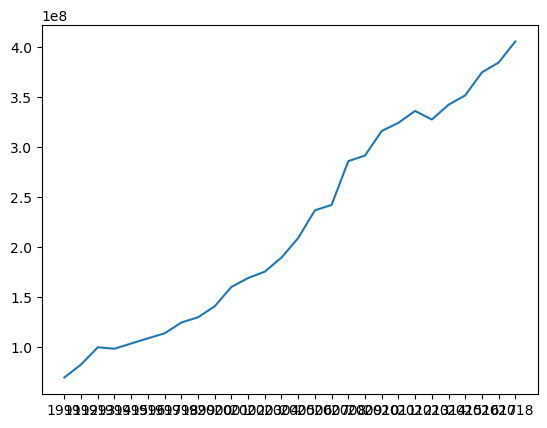

In [26]:
plt.plot(city_opexp_total.index,city_opexp_total.values)

In [27]:
years = capfund_testing.columns[8:]
city_capfund = capfund_testing.loc[capfund_testing['City'] == city]
city_capfund = city_capfund[years]
city_capfund_total = city_capfund.sum()*inflation.values[:-1,1]
city_capfund_total

1991    2.311750e+07
1992    3.537996e+07
1993    3.100537e+07
1994    4.253811e+07
1995    4.535104e+07
1996    4.485303e+07
1997    8.093963e+07
1998    5.871718e+07
1999    7.718722e+07
2000    7.024285e+07
2001    7.992799e+07
2002    1.471668e+08
2003    1.189151e+08
2004    9.037745e+07
2005    1.084952e+08
2006    4.837270e+07
2007    1.034679e+08
2008    1.135845e+08
2009    1.247311e+08
2010    1.476221e+08
2011    1.512303e+08
2012    1.187174e+08
2013    6.069519e+07
2014    6.205617e+07
2015    5.990061e+07
2016    7.892256e+07
2017    9.166083e+07
2018    1.209894e+08
dtype: float64

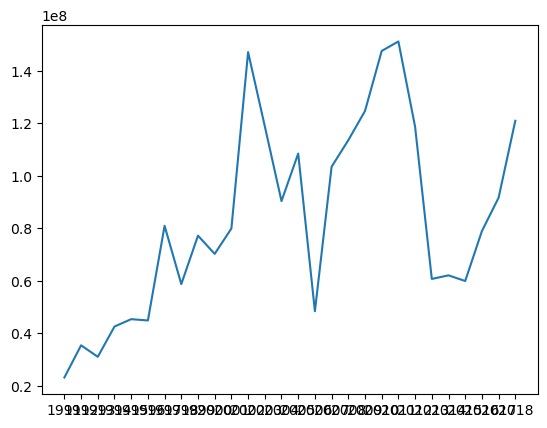

In [28]:
plt.plot(city_capfund_total.index,city_capfund_total.values)

In [29]:
years = ridership_testing.columns[8:]
city_ridership = ridership_testing.loc[ridership_testing['City'] == city]
city_ridership = city_ridership[years]
city_ridership_total = city_ridership.sum()
city_ridership_total

1991    85108033.0
1992    75752634.0
1993    77577155.0
1994    74127172.0
1995    73549183.0
1996    72921993.0
1997    72439474.0
1998    73730223.0
1999    74618454.0
2000    75130612.0
2001    74827040.0
2002    73807448.0
2003    68242432.0
2004    66021099.0
2005    67179046.0
2006    68498788.0
2007    68525198.0
2008    67684550.0
2009    68677215.0
2010    66145567.0
2011    63837165.0
2012    65854009.0
2013    63553898.0
2014    63650308.0
2015    65202493.0
2016    63823513.0
2017    63230618.0
2018    63463854.0
dtype: float64

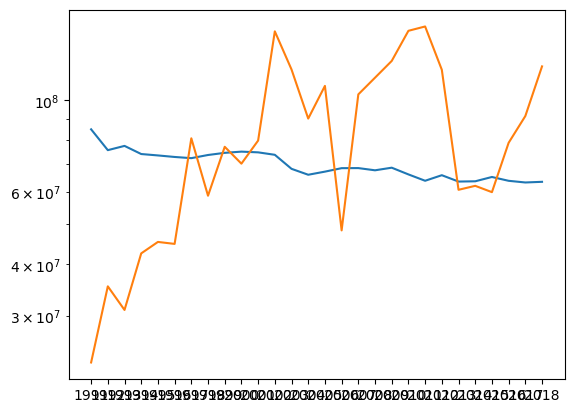

In [30]:
plt.plot(city_ridership_total.index,city_ridership_total.values)
plt.plot(city_capfund_total.index,city_capfund_total.values)
plt.yscale('log')

### Model Building

Combining dataframes to then see which have the strongest coefficients when doing multiple linear regression

In [44]:
years_num = np.asarray(years.values.astype('int'))
years_series = pd.Series(years_num)
combined_series  = pd.concat([city_ridership_total,city_opexp_total,city_capfund_total], axis=1)
combined_series[3] = combined_series.index
combined_series

,0,1,2,3
1991,85108033.0,6.974952e+07,2.311750e+07,1991
1992,75752634.0,8.277914e+07,3.537996e+07,1992
1993,77577155.0,9.995481e+07,3.100537e+07,1993
1994,74127172.0,9.850204e+07,4.253811e+07,1994
1995,73549183.0,1.037624e+08,4.535104e+07,1995
1996,72921993.0,1.089150e+08,4.485303e+07,1996
1997,72439474.0,1.139041e+08,8.093963e+07,1997
1998,73730223.0,1.247038e+08,5.871718e+07,1998
1999,74618454.0,1.299746e+08,7.718722e+07,1999
2000,75130612.0,1.409887e+08,7.024285e+07,2000


In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler() # Putting them on the same scale
scaler.fit(combined_series)

StandardScaler()

In [34]:
combined_scaled = scaler.transform(combined_series)

In [35]:
combined_scaled

array([[ 2.84177821, -1.43207449, -1.65082411, -1.67125804],
       [ 1.09371067, -1.30908091, -1.3152109 , -1.54746115],
       [ 1.43462461, -1.14695055, -1.43493963, -1.42366426],
       [ 0.78999114, -1.16066404, -1.11929852, -1.29986737],
       [ 0.6819932 , -1.1110089 , -1.04231089, -1.17607048],
       [ 0.564802  , -1.06237054, -1.05594114, -1.05227358],
       [ 0.47464274, -1.0152756 , -0.06828174, -0.92847669],
       [ 0.71582075, -0.91333141, -0.67649122, -0.8046798 ],
       [ 0.88178777, -0.86357789, -0.17098197, -0.68088291],
       [ 0.97748511, -0.75960986, -0.36104328, -0.55708601],
       [ 0.92076232, -0.57694993, -0.09596924, -0.43328912],
       [ 0.73025033, -0.49264651,  1.74429821, -0.30949223],
       [-0.30957959, -0.4324784 ,  0.97107516, -0.18569534],
       [-0.72463833, -0.29954979,  0.19002342, -0.06189845],
       [-0.50827455, -0.11495624,  0.68589052,  0.06189845],
       [-0.26167917,  0.14682344, -0.95961058,  0.18569534],
       [-0.25674443,  0.

In [36]:
combined_scaler_no_zeros = combined_scaled[:,:]


years_num = np.asarray(years.values.astype('int'))[:]

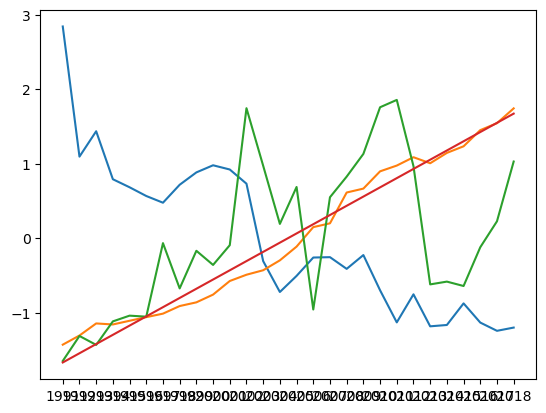

In [48]:
# Plot of standardized quantities
plt.plot(years[:],combined_scaler_no_zeros[:,0])
plt.plot(years[:],combined_scaler_no_zeros[:,1])
plt.plot(years[:],combined_scaler_no_zeros[:,2])
plt.plot(years[:],combined_scaler_no_zeros[:,3])

In [38]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()
print(combined_scaler_no_zeros[:,1:4])
model.fit(combined_scaler_no_zeros[:,1:4],combined_scaler_no_zeros[:,0])

[[-1.43207449 -1.65082411 -1.67125804]
 [-1.30908091 -1.3152109  -1.54746115]
 [-1.14695055 -1.43493963 -1.42366426]
 [-1.16066404 -1.11929852 -1.29986737]
 [-1.1110089  -1.04231089 -1.17607048]
 [-1.06237054 -1.05594114 -1.05227358]
 [-1.0152756  -0.06828174 -0.92847669]
 [-0.91333141 -0.67649122 -0.8046798 ]
 [-0.86357789 -0.17098197 -0.68088291]
 [-0.75960986 -0.36104328 -0.55708601]
 [-0.57694993 -0.09596924 -0.43328912]
 [-0.49264651  1.74429821 -0.30949223]
 [-0.4324784   0.97107516 -0.18569534]
 [-0.29954979  0.19002342 -0.06189845]
 [-0.11495624  0.68589052  0.06189845]
 [ 0.14682344 -0.95961058  0.18569534]
 [ 0.19775952  0.5482973   0.30949223]
 [ 0.61164739  0.82518178  0.43328912]
 [ 0.66420175  1.13025316  0.55708601]
 [ 0.89601383  1.75676013  0.68088291]
 [ 0.97355387  1.85551469  0.8046798 ]
 [ 1.08572437  0.96566261  0.92847669]
 [ 1.0045148  -0.6223548   1.05227358]
 [ 1.1438232  -0.58510593  1.17607048]
 [ 1.23241934 -0.64410178  1.29986737]
 [ 1.44952935 -0.12348721

LinearRegression()

### Model Results

Coefficients show which is the strongest parameter (I think?)

So far it seems it is year which is good

In [40]:
model.coef_

array([ 0.40637314, -0.04907654, -1.28425964])

In [41]:
sklearn_y_pred = model.predict(combined_scaler_no_zeros[:,1:4])

Unsure about this part below...

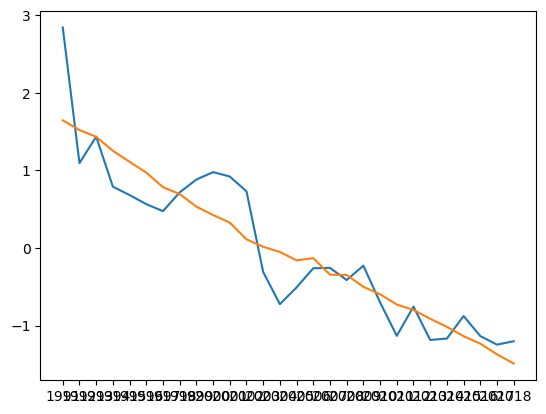

In [42]:
plt.plot(years[:],combined_scaler_no_zeros[:,0])
plt.plot(years[:],sklearn_y_pred,'-')